In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('./data/bodyfat.csv')

In [14]:
from sklearn.preprocessing import StandardScaler



In [15]:
def my_train_test_split(df: pd.DataFrame, y_columns, test_size, random_state=None):
    # shuffle
    df = df.sample(frac=1, random_state=random_state)

    x_columns = [col for col in df.columns if col not in y_columns]

    X = df[x_columns].to_numpy()
    Y = df[y_columns].to_numpy()

    X = StandardScaler().fit_transform(X)
    Y = StandardScaler().fit_transform(Y)

    split_index = int((1.0 - test_size) * len(df))


    # Finally, we split the data
    X_train = X[:split_index].reshape(split_index, len(x_columns), 1)
    Y_train = Y[:split_index].reshape(split_index, len(y_columns), 1)
    X_test = X[split_index:].reshape(len(df) - split_index, len(x_columns), 1)
    Y_test = Y[split_index:].reshape(len(df) - split_index, len(y_columns), 1)

    return X_train, Y_train, X_test, Y_test

In [16]:
xtrain, ytrain, xtest, ytest = my_train_test_split(data, ['BodyFat'], 0.3)

In [17]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1])
ytrain = ytrain.reshape(ytrain.shape[0], ytrain.shape[1]).squeeze(axis=1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1])
ytest = ytest.reshape(ytest.shape[0], ytest.shape[1]).squeeze(axis=1)

In [18]:
EPOCH = 150
ALPHA = 0.75
DEBUG = 1


In [19]:
from net import MLP
net = MLP(nin=14, nouts=[8, 6, 3, 1])

In [20]:
J = []

for k in range(EPOCH):
  
    # Forward pass
    ypred = [net(x) for x in xtrain]
    
    cost = sum((yout - ygt) ** 2 for ygt, yout in zip(ytrain, ypred)) / (2 * len(ytrain))

    for p in net.parameters():
        p.grad = 0.0
    
    # Compute gradients using the backward method
    cost.backward()

    # Update weights
    for p in net.parameters():
        p.data += -ALPHA * p.grad
    
    J.append(cost)
    
    if DEBUG:
        print("epoch ", k+1, " loss ", cost)
        print('GRAD', [p.grad for p in net.parameters()])
        print('DATA', [p.data for p in net.parameters()], '\n')

    

epoch  1  loss  T(0.7238772418448651, 1.0)
GRAD [0.07892395961403958, -0.043923461444295056, -0.0479593628904316, 0.007543431849639023, -0.03688883940631462, -0.05932279810739779, -0.06972835345932599, -0.055090195150237886, -0.03969932422885219, -0.049042213723821816, -0.01329619094255648, -0.04685186172786727, -0.03249007902935884, -0.035870902612735324, -0.051376624160882275, 0.017857385956348372, -0.005502476075892503, -0.011792118767869697, -0.00573420633317223, -0.00793786914554624, -0.010410583863648359, -0.01288418759048833, -0.012735886086891383, -0.012874142798023385, -0.013086168896972766, -0.00465683784468944, -0.01018413001300779, -0.009466690753618468, -0.006624627684754287, -0.011547720919110438, -0.011832752221821051, 0.006570477889237012, -0.0014211035804829355, -0.005855746618524563, -0.0008119107768957449, 0.0017070069677622994, 0.0035062829263087067, -0.0009580795988715179, 0.0002272404020024452, -0.0015168510234274193, -0.00503430460025024, 0.00010569818409887551, 

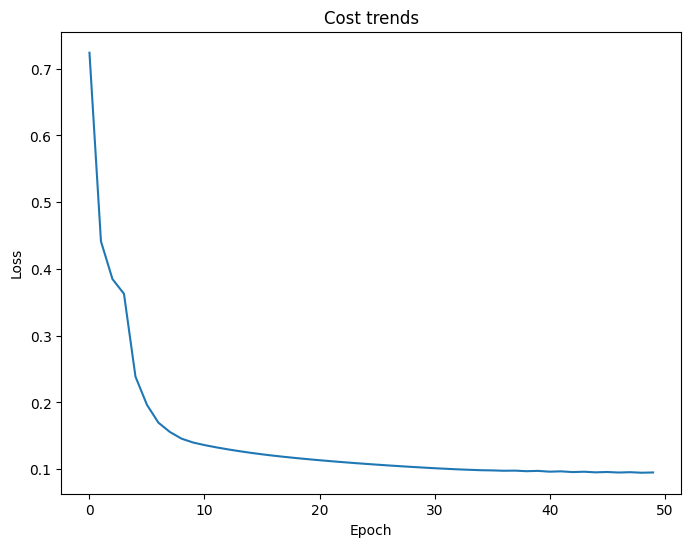

In [21]:
plt.figure(figsize=(8,6))
plt.plot([j.data for j in J])
plt.title('Cost trends')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [22]:
ytest_pred = [net(x) for x in xtest]
for y, ytru in zip(ytest_pred, ytest):
    print(y, ytru)

T(-0.9887679587841895, 0.0) -0.4730288835735321
T(-0.4019199125146544, 0.0) -0.2575147196633731
T(-0.7142472032344871, 0.0) -0.13778462860217366
T(-0.9926072430495808, 0.0) -1.8259789125650854
T(0.8582253540014502, 0.0) 0.3650817538548638
T(-0.9984545570596641, 0.0) -1.6224377577610465
T(0.7849151306880146, 0.0) 0.05378351709574558
T(0.9196950682291806, 0.0) 0.1495675899447048
T(-0.9893624879748066, 0.0) -0.485001892679652
T(0.016261889646489593, 0.0) -0.20962268323889346
T(0.7862106949496827, 0.0) 0.25732467189978453
T(-0.9970387611697484, 0.0) -1.5027076666998471
T(-0.997271683619825, 0.0) -1.8499249307773253
T(-0.9839270451734518, 0.0) -1.6703297941855262
T(-0.9590662233844738, 0.0) -0.8801111931816099
T(0.9261470145711317, 0.0) 1.6342207191035774
T(0.7099291101751223, 0.0) 0.40100078117322374
T(0.6820937545661344, 0.0) 0.9517592000547412
T(0.7926329318767341, 0.0) 0.37705476296098395
T(-0.7210139385610863, 0.0) -0.3652718016184524
T(-0.9322104863087349, 0.0) -0.6645970292714511
T(0